<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Identification of major customer segments on a transactional dataset. </u></b>



## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Data Preperation**

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
retail_df= pd.read_excel('/content/drive/MyDrive/Almabetter/Capstone Projects/Online Retail Customer Segmentation - Abhishek Shubham/Online Retail.xlsx') 

In [4]:
#Checking the top 5 rows
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Checking the bottom 5 rows
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
#Basic info of the dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# Shape of teh dataset
retail_df.shape

(541909, 8)

In [8]:
#Getting all the null values and their percentage
null_values= retail_df.isnull().sum().sort_values(ascending= False)
total= len(retail_df)
percentage_null_values= (null_values/total )* 100
null_df= pd.concat([null_values, percentage_null_values], axis= 1, keys= ['Total Null Values', 'Percentage %'])
null_df

,Total Null Values,Percentage %
CustomerID,135080,24.926694
Description,1454,0.268311
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


- Only 2 columns has missing values i.e. 'CustomerID' and 'Description'.
- Around 25% missing values are there in **CustomerID** and 0.26% null values present in **Description** column.
- These are such features that we cannot impute with other values because customer IDs are unique for each customer, so we have to drop these instances.

In [9]:
retail_df.shape

(541909, 8)

In [10]:
#Dropping rows with null values
retail_df.dropna(inplace= True)

In [11]:
retail_df.shape

(406829, 8)

In [12]:
#Number of duplicate values
print(len(retail_df[retail_df.duplicated()]))

5225


In [13]:
# Dropping duplicate rows
retail_df.drop_duplicates(inplace=True)

In [14]:
#New shape of DataFrame
retail_df.shape

(401604, 8)

Now we are left with 401604 instances/rows in our dataset after dropping Null and duplicate values.

In [15]:
#Converting 
retail_df['StockCode'].value_counts()

85123A    2065
22423     1894
85099B    1659
47566     1409
84879     1405
          ... 
90104        1
90135        1
90027D       1
90027A       1
84746        1
Name: StockCode, Length: 3684, dtype: int64

In [16]:
#
retail_df['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560912      1
560913       1
560917       1
572879       1
553049       1
Name: InvoiceNo, Length: 22190, dtype: int64

In [17]:
#Descriptive statistics
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics we can say that customers usually buy **5** quantity of products per order. Also the median price that the company get paid by the customer for one unit is about **1.95.**

##Feature Engineering

In [18]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
#Creating a new feature Total amount
retail_df['total_amount']= retail_df['Quantity']* retail_df['UnitPrice']

In [20]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [21]:
#Extracting year, month, day and hours data from InvoiceDate column and creating a seperate column for these features.

retail_df['Invoice_year']= retail_df['InvoiceDate'].apply(lambda x: x.year )
retail_df['Invoice_month']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%B'))
retail_df['Invoice_day']= retail_df['InvoiceDate'].apply(lambda x: x.strftime('%A'))
retail_df['Invoice_hour']= retail_df['InvoiceDate'].apply(lambda x: x.hour)

In [22]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In feature engineering we have created total 5 new featues i.e. **total_amount, Invoice_year, Invoice_month, Invoice_day, Invoice_hour** from the existing features.

##**Exploratory Data Analysis**

###**Univariate Analysis**

In [23]:
Numerical_features = list(retail_df.select_dtypes(['int64', 'float64']))
Numerical_features


['Quantity',
 'UnitPrice',
 'CustomerID',
 'total_amount',
 'Invoice_year',
 'Invoice_hour']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


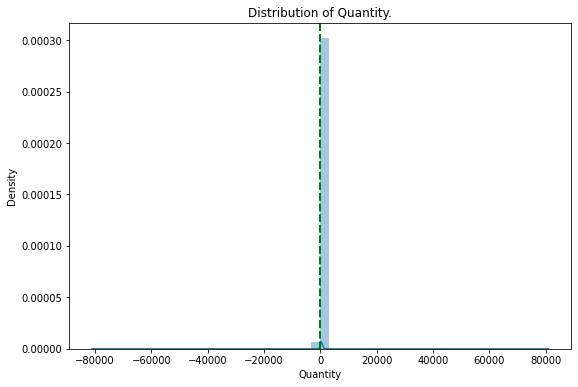

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


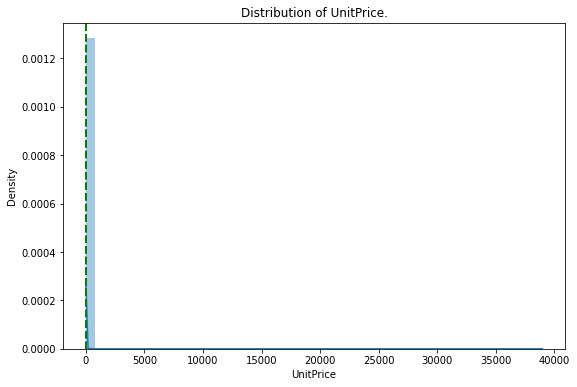

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


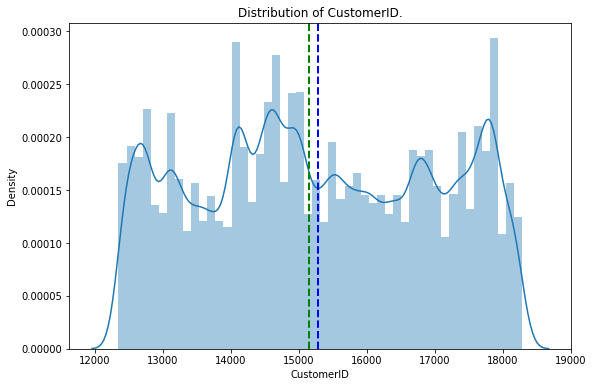

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


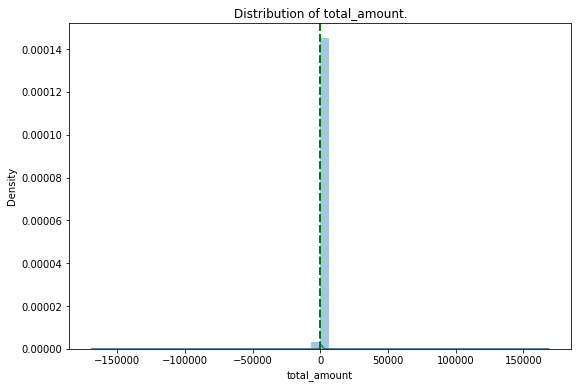

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


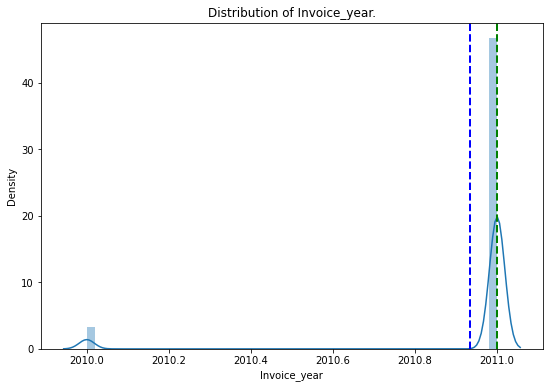

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


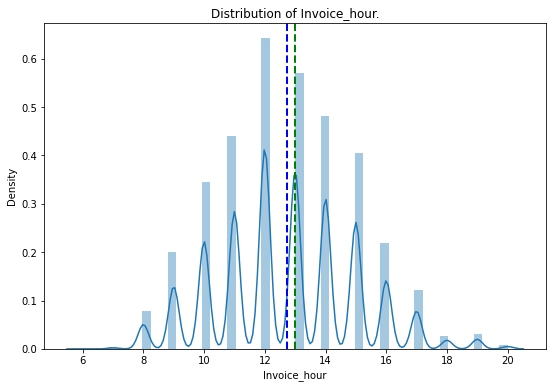

In [24]:
for col in Numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (retail_df[col])
  sns.distplot(retail_df[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Distribution of {col}.')
  plt.show()

In [25]:
retail_df[retail_df['total_amount']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,December,Wednesday,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,December,Wednesday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,December,Wednesday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,December,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,December,Friday,9
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,December,Friday,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,December,Friday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,December,Friday,11


In [26]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


# Univariate analysis on individual columns

- Invoice MOnth, Invoice Day and Invoice hour
- No/count of products ordered
- count of quantities ordered
- country from which maximum order's are placed

In [27]:
# Count of unique values in hour column
retail_df.Invoice_hour.value_counts()

12    72213
13    64051
14    54194
11    49525
15    45641
10    38725
16    24618
9     22446
17    13604
8      8789
19     3423
18     3104
20      847
7       383
6        41
Name: Invoice_hour, dtype: int64

Text(0.5, 1.0, 'NO of orders placed per hour')

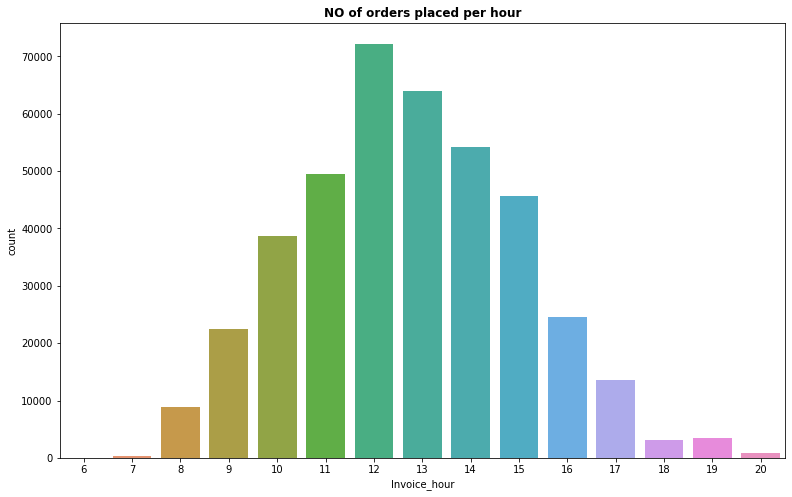

In [28]:
#Visualizing Invoice_hour column
plt.figure(figsize= (13, 8))
sns.countplot(x= 'Invoice_hour', data= retail_df)
plt.title('NO of orders placed per hour', weight= 'bold')

In [29]:
retail_df.Quantity.value_counts()

 1        69605
 12       59828
 2        57425
 6        37480
 4        32093
          ...  
 828          1
 560          1
-408          1
 512          1
-80995        1
Name: Quantity, Length: 436, dtype: int64

In [30]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_amount', 'Invoice_year',
       'Invoice_month', 'Invoice_day', 'Invoice_hour'],
      dtype='object')

In [31]:
retail_df.Invoice_day.value_counts()

Thursday     81575
Wednesday    69753
Tuesday      67376
Monday       65715
Sunday       61673
Friday       55512
Name: Invoice_day, dtype: int64

Text(0.5, 1.0, 'Orders placed per day')

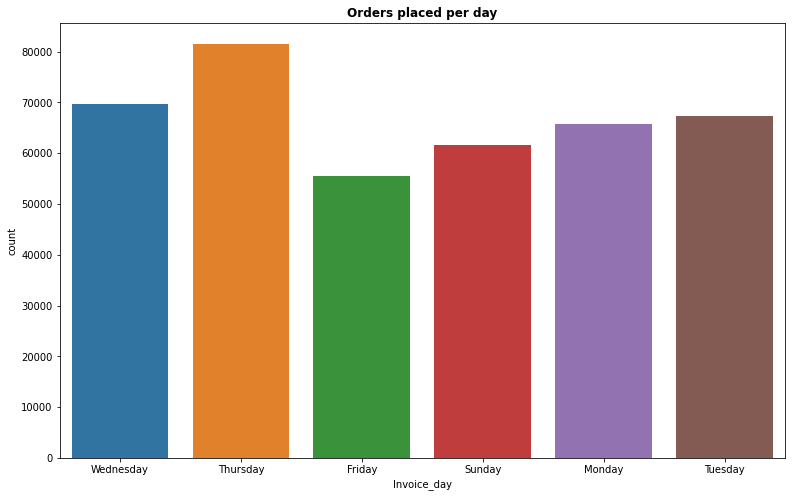

In [32]:
#Visualizing Invoice_hour column
plt.figure(figsize= (13, 8))
sns.countplot(x= 'Invoice_day', data= retail_df)
plt.title('Orders placed per day', weight= 'bold')

In [33]:
retail_df.Invoice_month.value_counts()

November     64232
October      49928
December     43736
September    40459
May          28661
June         27576
March        27516
August       27444
July         27256
April        22988
January      21670
February     20138
Name: Invoice_month, dtype: int64

Text(0.5, 1.0, 'Count of orders per month')

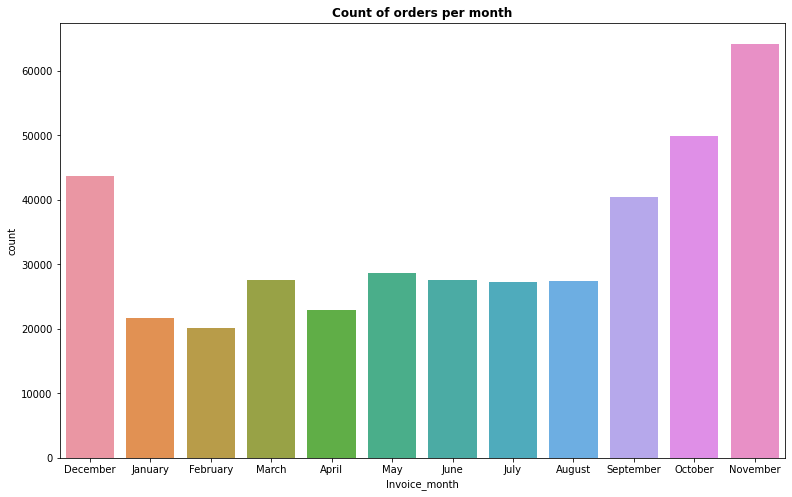

In [34]:
#Visualizing Invoice_hour column
plt.figure(figsize= (13, 8)) 
sns.countplot(x= 'Invoice_month', data= retail_df)
plt.title('Count of orders per month', weight= 'bold')

In [35]:
top_10_countries= retail_df.Country.value_counts().reset_index()
top_10_countries.head(10)

,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


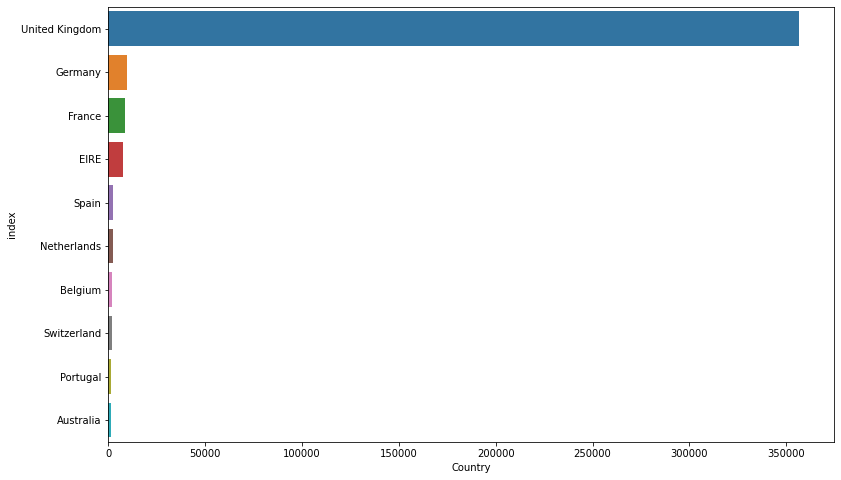

In [36]:
plt.figure(figsize= (13, 8))
sns.barplot(y= 'index', x= 'Country', data= top_10_countries.head(10))

In [37]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_amount', 'Invoice_year',
       'Invoice_month', 'Invoice_day', 'Invoice_hour'],
      dtype='object')

In [39]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_amount,Invoice_year,Invoice_month,Invoice_day,Invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,December,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,December,Wednesday,8


In [ ]:
# Top products ordered, Top customers, Revenue per counntry, 

In [ ]:
retail_df.columns

In [40]:
Top_5_products= retail_df.groupby('Description').count()['CustomerID'].reset_index().sort_values(by= 'CustomerID', ascending= False)
Top_5_products.rename(columns= {'Description':'Products', 'CustomerID': 'Count'}, inplace= True)
Top_5_products.head()

,Products,Count
3716,WHITE HANGING HEART T-LIGHT HOLDER,2058
2780,REGENCY CAKESTAND 3 TIER,1894
1771,JUMBO BAG RED RETROSPOT,1659
2355,PARTY BUNTING,1409
217,ASSORTED COLOUR BIRD ORNAMENT,1405


Text(0.5, 1.0, 'Top 5 products')

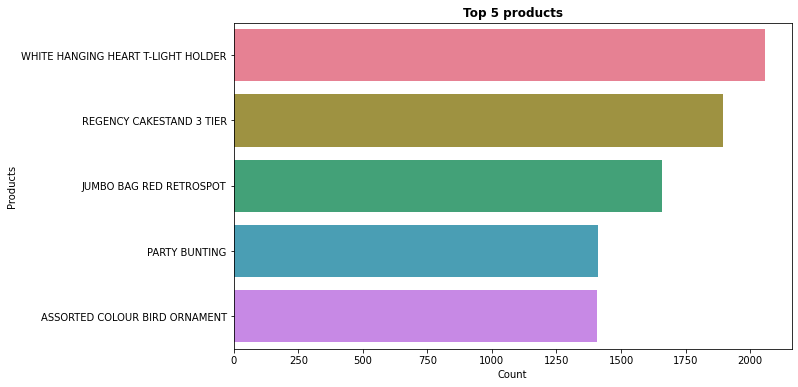

In [41]:
#Visualizing top 5 products
plt.figure(figsize= (10, 6))
sns.barplot(y= 'Products', x= 'Count', data= Top_5_products.head(), palette= 'husl')
plt.title('Top 5 products', weight= 'bold')

In [42]:
#Visualizing top customers
Top_10_customers= retail_df.CustomerID.value_counts().reset_index()
Top_10_customers.rename(columns= {'index':'CustomerID', 'CustomerID': 'Count'}, inplace= True)
Top_10_customers.head(10)

,CustomerID,Count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759
5,15311.0,2478
6,14646.0,2085
7,13089.0,1853
8,13263.0,1667
9,14298.0,1640


Text(0.5, 1.0, 'Top 10 customers')

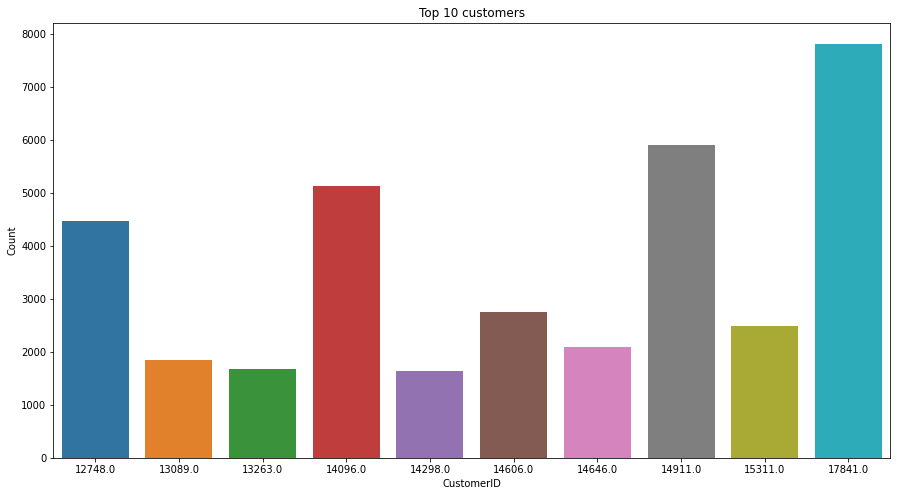

In [45]:
plt.figure(figsize= (15, 8))
sns.barplot( x= 'CustomerID',y= 'Count', data= Top_10_customers.head(10))
plt.title('Top 10 customers')